# Занятие 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

-------
<h1 align="center"> Работа с признаками </h1> 

# 1.Загрузка данных

Описание данных: https://archive.ics.uci.edu/ml/datasets/Adult

скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

Функция ```pd.read_csv()``` позволяет загрузить файлы из .csv файлов, чаще всего используемый для хранения данных в виде таблицы. 

Часто используемые параметры функции, на которые стоит обратить внимание:

* ```sep``` - сепаратор, по умолчанию автоматически определяется pandas-ом, но могут возникнуть затруднения (например, если стоит табуляция, тогда следует указать - '\t')
* ```header``` - список названий колонок, по умолчанию берется первая строка в .csv файле. Может указать None, если названий нет и потом задать колонки вручную: df.columns = ['col1 name', 'col2 name', ...]. Полезные параметр - skip_blank lines, пропустить пустые линии, часто бывает, что заполняют не с нулевой. Кроме этого можно указать число, которую строку воспринимать названием колонки (часто бывает, что в шапке документа стоит различная побочная информация, не имеющая отношения к сути); отсчет с 0, по умолчанию 0.
* ```index_col``` - какую колонку использовать в качестве индексов, если это даты, то стоит обратить внимание на параметр parse_dates.
* ```parse_dates``` - позволяет использовать в качестве индекса даты (pandas datetime), позволяет делать удобную навигацию по документу и корректное отображение дат. Если передан аргумент True - pandas автоматически попробует сконвертировать колонку индексов в формат даты (можно указать свой date_parser - конвертацию в нужный формат даты). Можно передать [1, 2, 3] - проанализирует колонки 1, 2, 3 как отдельные колонки даты. Альтернативно можно указать колонки, которые можно объединить и пропарсить как одну колонку дат, например [[1, 3]].
* ```encoding``` - указать формат кодировки данных. По умолчанию документы используют формат 'utf-8'. Если содержимое отобразилось некорректно, чаще всего встречаются 'latin' или 'window-1251'. 

Первый аргумент (позиционный), можно указать явно filepath_or_bufferstr. Принимает не только путь (str) к файлу на Вашей ОС, но и ссылку на внешний, скачиваемый в интернете файл, как в примере в интернете. На практике можно указать на любую валидную схему (не только http://... ), например указывающюю на ваше внешнее сетевое хранилище или облачный сервис, например ftp, s3, github.

Хотя .csv один из самых распространенных сценариев загрузки данных pandas поддерживает множествао других источников, например sql базы данных, экосистему hadoop, pickle, excel, json, html, sas.




In [ ]:
!wget -O data.csv https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2022-10-04 06:32:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘data.csv’

data.csv            100%[===================>]   3.79M  9.85MB/s    in 0.4s    

2022-10-04 06:32:11 (9.85 MB/s) - ‘data.csv’ saved [3974305/3974305]



In [ ]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 2.Исследование данных

Основные пункты, которые надо исследовать в ходе обработки данных:

1. Вычисление основных (описательных) статистик
2. Исследование распределений данных
3. Исследование на пропуски
4. Корректность заполнения данных с точки зрения здравого смысла (например, нету ли возраста > 150 лет)
5. Исследование на дубликаты
6. Кодировка данных





1. корректность заполнения
2. дубликаты
3. аномалии
4. пропуски
5. кодировка данных
6. Вычисление описательных статистик

## 2.1.Корректность заполнения

In [ ]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

Если посмотреть на название колонок выше, то видно много некорректно заполненых. На основе источника данных, откуда вы их берете (например uci, kaggle, google datasets) можно указать свои названия.

In [ ]:
# Назначаем имена колонок от поставщика данных
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

## 2.2.Дубликаты

In [ ]:
df.drop_duplicates()

In [ ]:
len(df)

32560

In [ ]:
df.head(10)

## 2.3.Аномалии

Смотрим на аномалии по возрасту, нет ли 150 летних людей

In [ ]:
df[df['age'] > 89]

## 2.4.Пропуски

В машинном обучении алгоритмы принимают на вход точки данных (data points) - векторы - строки (в таблице), в числовом формате (например текст может быть закодирован определенным форматом). Конечно можно попробовать закодировать пропущенные значения специальным значением (например, нулем), но такой подход заранее закладывает непредвиденное поведение в алгоритмы - мы не можем различить то, что не видели. Чаще всего выбрасывается вся строка, где есть хоть один пропуск, но это может быть нерационально в случае, если есть колонки (признаки), которые сами по себе редко заполняются или нерелевантны для некоторой целевой колонки (искомой, которую нужно предсказывать на основе всех остальных описаний, например на есть исторические метереологические показатели и соответсвующие им температуры). Такие колонки нужно определить с помощью визуализаций или описательных статистик.  

In [ ]:
# чаще всего используется для проверки на наличие пропусков
# показывает название, кол-во ненулевых объектов, их тип данных и объем занимаемой датафреймом памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educ-num        32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df._get_numeric_data().columns.shape # колонки с цифромыми значениями

In [ ]:
df.isna().any() #пропуски

In [ ]:
# df.isnull().sum() # нули
# df.dropna(inplace=True)

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Видим есть пропущенные данные со знаком "?"

In [ ]:
df[df['workclass'] == ' ?']

In [ ]:
df == ' ?'

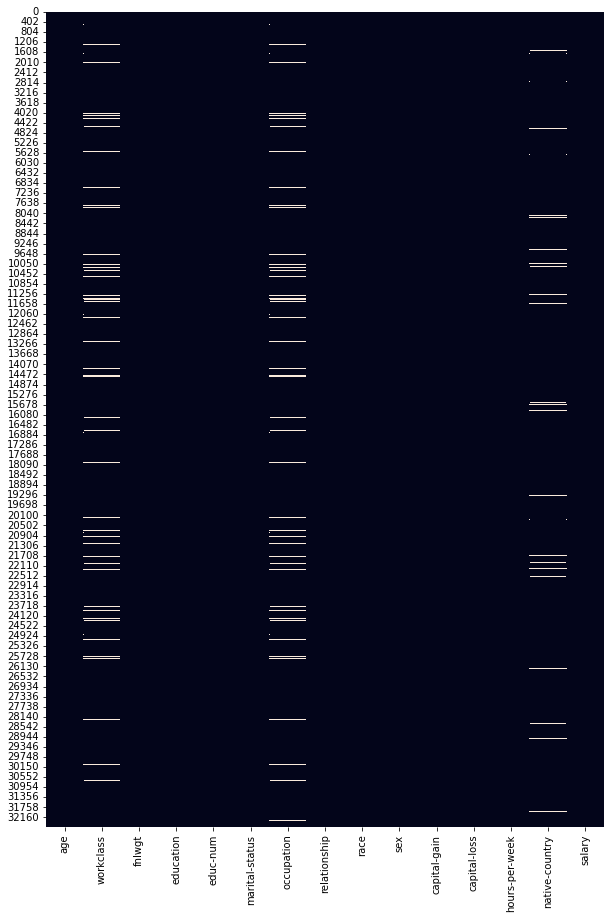

In [ ]:
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df == ' ?', cbar=False)

In [ ]:
# хвост данных
df.tail()

В данном датасете пропущенные значения обозначены как " ?".  Удалим из выборки все объекты с пропусками.

In [ ]:
# удалим все объекты, в которых содержатся пропуски
df = df.dropna()
df.count()

age               32560
workclass         32560
fnlwgt            32560
education         32560
educ-num          32560
marital-status    32560
occupation        32560
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    32560
salary            32560
dtype: int64

In [ ]:
df.groupby('salary').count()[['age']]

,age
salary,
0,24719
1,7841


## 2.5.Кодировка данных

In [ ]:
# отобразит типы данных
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
educ-num           int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
df.age.dtypes

dtype('int64')

In [ ]:
df['age'].astype(np.int32)

0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: age, Length: 32560, dtype: int32

Изменить тип колонки можно с помощью метода astype. Применим этот метод к признаку age (возраст) в демонстративных целях.


In [ ]:
df['age'] = df['age'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  float64
 1   workclass       32560 non-null  object 
 2   fnlwgt          32560 non-null  int64  
 3   education       32560 non-null  object 
 4   educ-num        32560 non-null  int64  
 5   marital-status  32560 non-null  object 
 6   occupation      32560 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32560 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32560 non-null  int64  
 13  native-country  32560 non-null  object 
 14  salary          32560 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


## 2.6.Вычисление описательных статистик

Функция describe отобразит основные статистики по каждому столбцу (тип данных которого числовой). По этим показателям можно понять корректность данных, их разброс. Описательные статистические данные включают те, которые суммируют центральные тенденции: дисперсию и форму распределения набора данных, исключая значения NaN. Анализирует как числовые, так и ряды объектов, а также наборы столбцов DataFrame со смешанными типами данных. Выход будет варьироваться в зависимости от того, что предоставляется. Обратитесь к примечаниям для более подробной информации.

In [ ]:
df.describe()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# если мы хотим узнать количество примеров и признаков в каждом примере (кол-во строк и столбцов)
df.shape

(32560, 15)

## мой код

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.age.value_counts()

36.0    898
31.0    888
34.0    886
23.0    877
35.0    876
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: age, Length: 73, dtype: int64

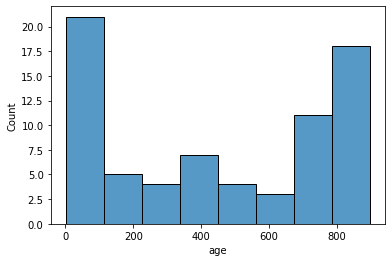

In [ ]:
sns.histplot(df.age.value_counts())

## продолжение

Иногда целесообразно исследовать конкретный признак. Например, в описываемом датафрейме есть признак salary (зарплата) выше определенного порога. Для задач классификации часто бывает нужно понять, каким количеством примеров представлен класс, это может повлиять на создание алгоритмов, например, если значений одного класса слишком мало (задачи несбалансированных данных).

In [ ]:
# обращаясь к колонке мы работаем с series, например хотим узнать элементы (уникальные названия) и их количество
df['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае,например, по hours-per-week (кол-во рабочих часов в неделю). Ascending=False для сортировки по убыванию:

In [ ]:
df.sort_values(by='hours-per-week', ascending=False).head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
30753,31.0,Private,33124,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
25830,31.0,Private,147284,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,99,United-States,>50K
19052,27.0,Private,40295,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K
8071,44.0,Self-emp-not-inc,26669,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,99,United-States,<=50K
14592,27.0,Private,179915,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,99,United-States,<=50K


Применение функции к каждому столбцу: apply применит (втч и любую вашу функцию, а не в цикле) переданную функцию к каждому столбцу. Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать axis=1.

In [ ]:
df.apply(np.max)

age                            90.0
workclass               Without-pay
fnlwgt                      1484705
education              Some-college
educ-num                         16
marital-status              Widowed
occupation         Transport-moving
relationship                   Wife
race                          White
sex                            Male
capital-gain                  99999
capital-loss                   4356
hours-per-week                   99
native-country           Yugoslavia
salary                         >50K
dtype: object

## Замена значений в целевой колонке с категориальной на бинарную классификацию

Например, метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь вида {old_value: new_value}:

In [ ]:
d = {' <=50K' : 0, ' >50K' : 1}
  
df['salary'] = df['salary'].map(d)
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


Аналогичную операцию можно провернуть с помощью метода replace ```(df = df.replace({'salary': d}) ) ```

In [ ]:
#df['salary'].value_counts()

0    24719
1     7841
Name: salary, dtype: int64

## Перекодировка категориальных признаков

Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [ ]:
# отображаем его
encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native-country': LabelEncoder()}

Посмотрим, во что переведены категориальные признаки

In [ ]:
df.groupby('race').count()[['age']]

,age
race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1039
Black,3124
Other,271
White,27815


In [ ]:
encoded_data.groupby('race').count()[['age']]

,age
race,
0,311
1,1039
2,3124
3,271
4,27815


In [ ]:
encoders['race'].transform([' White'])

array([4])

In [ ]:
df.groupby('workclass').count()[['age']]

,age
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1297
Without-pay,14


In [ ]:
encoded_data.groupby('workclass').count()[['age']]

,age
workclass,
0,1836
1,960
2,2093
3,7
4,22696
5,1116
6,2541
7,1297
8,14


## 2.7.Исследование распределений данных

Основные пункты:
1. баланс классов
2. линейные корреляции
3. группировки с целевым

### 2.7.1.Группировка данных


В общем случае группировка данных в Pandas выглядит следующим образом:
```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

* К датафрейму применяется метод groupby, который разделяет данные по grouping_columns – признаку или набору признаков.
* Выбираем нужные нам столбцы (columns_to_show).
* К полученным группам применяется функция или несколько функций.



Группирование данных в зависимости от значения признака salary и вывод статистик по трём столбцам в каждой группе

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].describe(percentiles=[])

age                                         educ-num             \
          count       mean        std   min   50%   max    count       mean   
salary                                                                        
0       24719.0  36.783648  14.020365  17.0  34.0  90.0  24719.0   9.594927   
1        7841.0  44.249841  10.519028  19.0  44.0  90.0   7841.0  11.611657   

                                  hours-per-week                             \
             std  min   50%   max          count       mean        std  min   
salary                                                                        
0       2.436100  1.0   9.0  16.0        24719.0  38.840163  12.319242  1.0   
1       2.385129  2.0  12.0  16.0         7841.0  45.473026  11.012971  1.0   

                    
         50%   max  
salary              
0       40.0  99.0  
1       40.0  99.0

Сделаем то же самое, но немного по-другому, передав в agg список функций:

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age                          educ-num                      \
             mean        std  amin  amax       mean       std amin amax   
salary                                                                    
0       36.783648  14.020365  17.0  90.0   9.594927  2.436100    1   16   
1       44.249841  10.519028  19.0  90.0  11.611657  2.385129    2   16   

       hours-per-week                       
                 mean        std amin amax  
salary                                      
0           38.840163  12.319242    1   99  
1           45.473026  11.012971    1   99

### 2.7.2.Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — salary и education. Для этого мы можем построить таблицу сопряженности, воспользовавшись методом crosstab:

In [ ]:
pd.crosstab(df['salary'], df['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
0,871,1115,400,162,317,606,487,802,1021,3133,107,8826,764,51,153,5904
1,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


Давайте посмотрим среднее число рабочих часов, классов образования для разных направлений работы:

In [ ]:
df.pivot_table(['hours-per-week', 'educ-num'], ['workclass'], aggfunc='mean').head(10)

,educ-num,hours-per-week
workclass,,
?,9.260349,31.919390
Federal-gov,10.973958,41.379167
Local-gov,11.042045,40.982800
Never-worked,7.428571,28.428571
Private,9.879714,40.267096
Self-emp-inc,11.137097,48.818100
Self-emp-not-inc,10.226289,44.421881
State-gov,11.374711,39.030840
Without-pay,9.071429,32.714286


#### Первые попытки прогнозирования 

Посмотрим, как зарплата связана с признаком образования (education). Сделаем это с помощью сводной таблички crosstab.

In [ ]:
pd.crosstab(df['salary'], df['education'], margins=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
0,871,1115,400,162,317,606,487,802,1021,3133,107,8826,764,51,153,5904,24719
1,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5354,413,10501,1723,51,576,7291,32560


Видим, что чем выше образование - тем больше в пропорции "1". Это и логично, доктора наук, вероятнее будут получать более, чем люди, у которых только 9 классов образования.

### 2.7.3.Визуализация

#### 2.7.3.1.matplotlib

самый простой и зачастую удобный способ визуализировать данные из pandas DataFrame — это воспользоваться функцией plot.

##### .plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b70e6dfd0>,
      dtype=object)

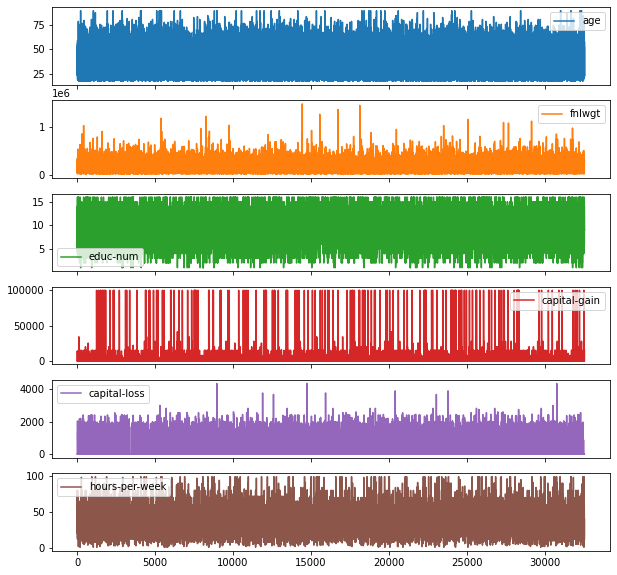

In [ ]:
# subplots нужен для расположения всех данных на разных графиках
df.plot(subplots=True, figsize = (10, 10))

##### Pie chart

In [ ]:
df['Month'].value_counts().plot.pie(figsize = (6, 6))

##### Столбцами

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр rot отвечает за угол наклона подписей к оси x.

In [ ]:
df.groupby(['salary'])[columns_to_show].agg([np.mean])

,age,educ-num,hours-per-week
,mean,mean,mean
salary,,,
<=50K,36.783648,9.594927,38.840163
>50K,44.249841,11.611657,45.473026


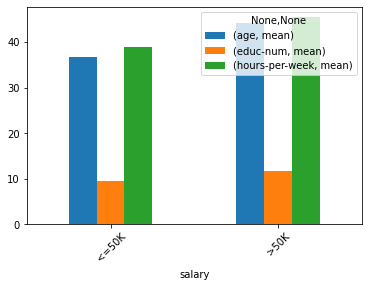

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].agg([np.mean]).plot(kind='bar', rot=45)

##### Гистограммы значений
постройте графики гистограмм зависимости различных признаков для того, чтоб оценить корректность данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b6e777e90>,
      dtype=object)

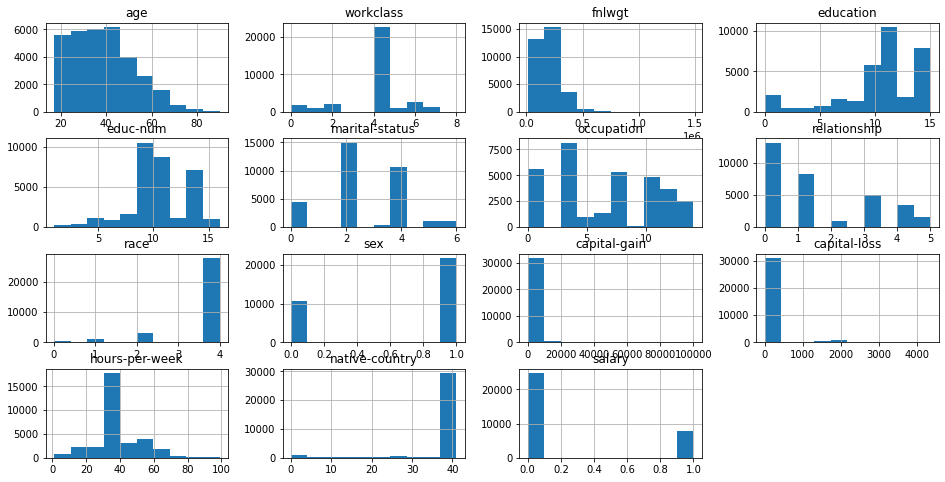

In [ ]:
encoded_data.hist(figsize=(16,8))

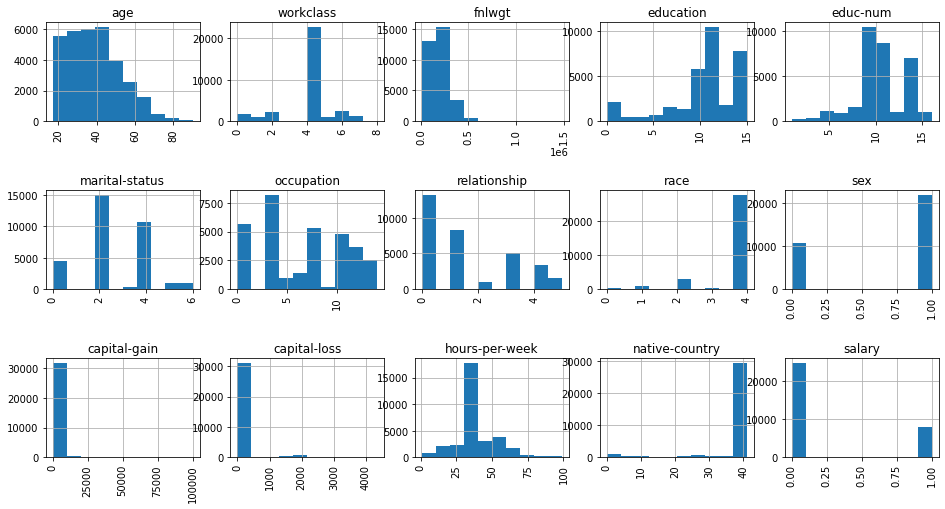

In [ ]:
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

##### мой код

In [ ]:
ninety = df[df.age==90]

In [ ]:
ninety.groupby('age')['hours-per-week'].value_counts()

age  hours-per-week
90   40                20
     10                 3
     50                 3
     15                 2
     20                 2
     35                 2
     4                  1
     12                 1
     24                 1
     25                 1
     30                 1
     37                 1
     45                 1
     55                 1
     60                 1
     72                 1
     99                 1
Name: hours-per-week, dtype: int64

In [ ]:
pd.crosstab(ninety['age'], ninety['hours-per-week']).tail()

hours-per-week,4,10,12,15,20,24,25,30,35,37,40,45,50,55,60,72,99
age,,,,,,,,,,,,,,,,,
90,1,3,1,2,2,1,1,1,2,1,20,1,3,1,1,1,1


In [ ]:
ninety.pivot_table(['age'],['hours-per-week']).tail()

,age
hours-per-week,
50,90
55,90
60,90
72,90
99,90


#### 2.7.3.2.Seaborn

In [ ]:
import seaborn as sns

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это, по сути, более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# найдем численные колонки
df.select_dtypes(include=numerics).head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,salary
0,50.0,83311,13,0,0,13,0
1,38.0,215646,9,0,0,40,0
2,53.0,234721,7,0,0,40,0
3,28.0,338409,13,0,0,40,0
4,37.0,284582,14,0,0,40,0


##### pairplot

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

In [ ]:
# вылетает при запуске
# sns_plot = sns.pairplot(df.select_dtypes(include=numerics))
# так можно сохранить график в png
# sns_plot.savefig('/content/pairplot.png')  

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.

In [ ]:
# вылетает при запуске
# sns.pairplot(df.select_dtypes(include=numerics))

В коллабе график вылетает, вот пример работы:


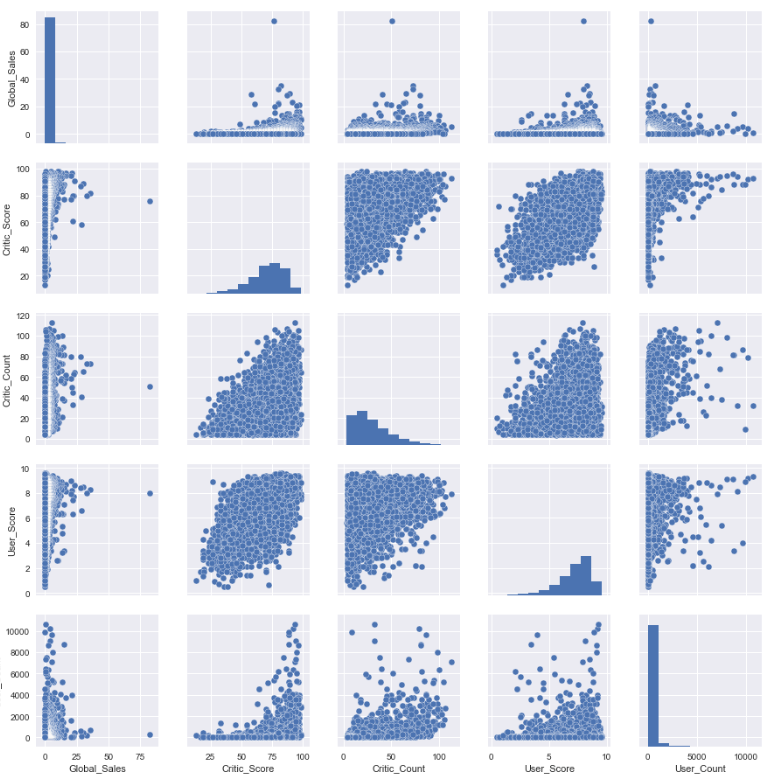

##### distplot

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение . По умолчанию на графике отображается гистограмма и kernel density estimation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


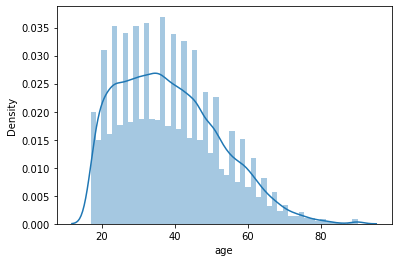

In [ ]:
sns.distplot(df['age'])

##### jointplot

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой возраст и зарплата.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


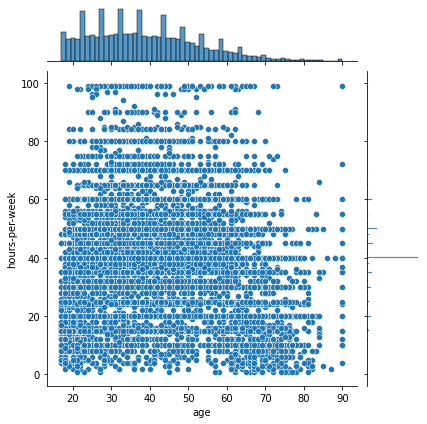

In [ ]:
sns.jointplot(df['age'], df['hours-per-week'])

##### box plot

Еще один полезный тип графиков — это box plot. Давайте сравним распределения сфер работы по возрасту.



In [ ]:
# value counts покажет уникальные значения и их кол-во
# sort values отсортирует (по убыванию)
# index покажет названия
# values переведет в numpy массив
data = df['workclass'].value_counts().sort_values(ascending = False).index.values
data

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

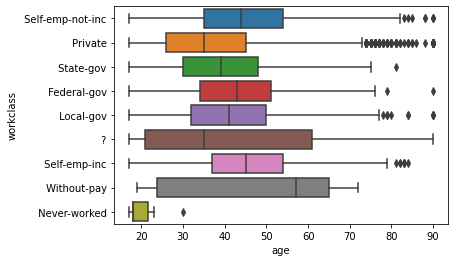

In [ ]:
sns.boxplot(y="workclass", x="age", data=df[df['workclass'].isin(data)], orient="h")

Думаю, стоит обсудить немного подробнее, как же понимать box plot. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
С коробкой разобрались, перейдем к усам. 

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.


Для понимания лучше один раз увидеть, поэтому вот еще и картинка с Wikipedia:

![](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

##### heatmap

И еще один тип графиков — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем количество людей в зависимости от рода деятельности и класса образования

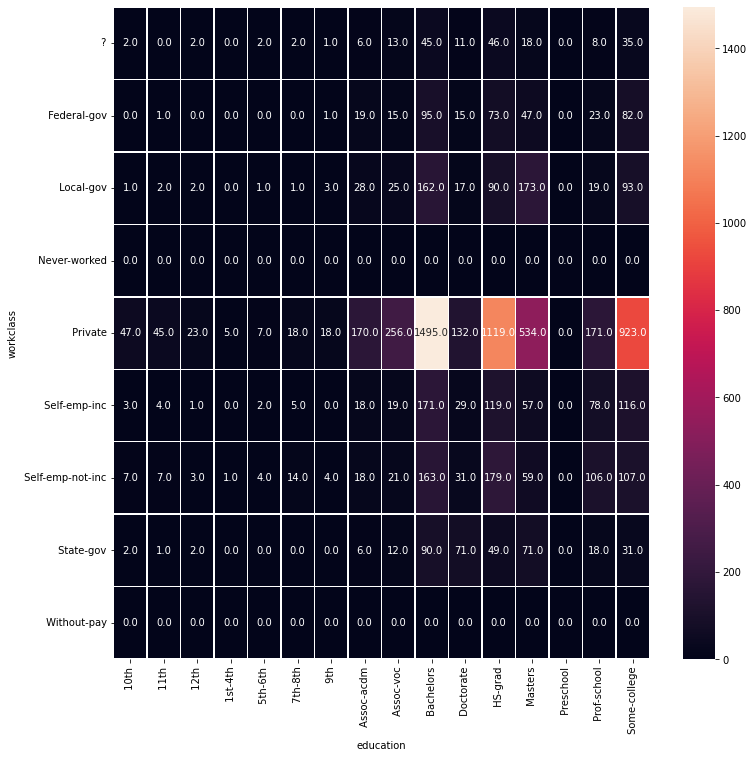

In [ ]:
table = df.pivot_table(
                        index='workclass', 
                        columns='education', 
                        values='salary',
                        aggfunc=sum).fillna(0).applymap(float)

from matplotlib.pyplot import figure
figure(figsize=(12, 12))
sns.heatmap(table, annot=True, fmt=".1f", linewidths=.5)

##### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками. 

Положительная зависимость означает прямую зависимость (чем больше одно, тем меньше другое), отрицательная означает обратное.

Значение близкое к нулю не обязательно означает отсутствие зависимости! Это лишь значит, что между признаками нет прямой (линейной) зависимости

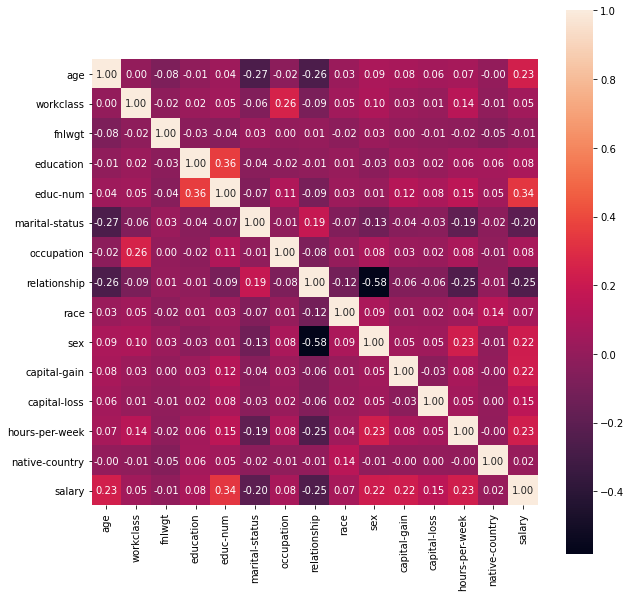

In [ ]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), fmt=".2f", annot=True, square=True)
plt.show()

# 3.Предобработка данных

Основные пункты предобработки данных:
1. кодирование данных - one-hot/label encoder
2. нормализация
3. Отложенная выборка train/val/test или train/test split или Кросс-валидация
4. стратификация по балансировке

У нас выше есть encoded_data и encoder если мы хотим взять всю таблицу с категорийными данными

## 3.1.Кодирование данных

### Dummy кодирование категориальных признаков

Для того, чтоб можно было выбрать нужные колонки

In [ ]:
# числовые признаки
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [ ]:
# Найдём категориальные признаки
Categorical_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
Categorical_cols

['relationship',
 'education',
 'workclass',
 'marital-status',
 'native-country',
 'sex',
 'occupation',
 'race']

In [ ]:
pd.get_dummies(df, columns=Categorical_cols) 
# так делать лучше не надо.
# Надо через ColumnTransformer и задать OneHotEncoder

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,salary,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32556,40,154374,9,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Будем предсказывать salary (> или < 50к в год - бинарная классификация)

In [ ]:
# создадим копию
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


## Возьмем только числовые признаки для быстроты и откинем категорийные

In [ ]:
X = np.array(df_prc[df._get_numeric_data().drop(columns=['salary']).columns])
y = df['salary'].values

In [ ]:
df_prc[df._get_numeric_data().drop(columns=['salary']).columns]

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [ ]:
X

array([[    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       [    53, 234721,      7,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

# 4.Обучение алгоритма

Основные пункты:
1. grid search и не только
2. обучение алгоритма c лучшими параметрами

## 4.1.Обучение KNN без предобработки (нормализация, стандартизация,масштабирование) и без GridSearch

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # функция разделения на train test
from sklearn.metrics import accuracy_score # доля верно угаданных ответов

# инициализируем алгоритм
knn = KNeighborsClassifier()
# разбиваем матрицу признаков и ответы на обучающую и тестовую выборки (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# обучаем алгоритм на train
knn.fit(X_train, y_train)
# получаем прогнозы на основе признаков test
preds = knn.predict(X_test)
# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества

# количество верно угаданных / количество всех ответов (! не стоит использовать при дизбалансе классов !)
accuracy_score(y_test, preds)

0.7753378378378378

**accuracy_score используем только на сбалансированных классах**

------------------------------
## Обучение алгоритмов и важность масштабирования

Качество прогнозов алгоритмов зависит от их (гипер)параметров (например, число соседей на основе которого строится ответ). Мы хотим найти такую комбинацию параметров, при которой качество (метрика качества) алгоритма на отложенной выборке будет максимизироваться.

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*). 

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Для получения более точной оценки нашего алгоритма будем использовать [кросс-валидацию](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)

Результаты тестов на каждом проходе (fold) усредним

![alt text](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

## 4.2.Обучение KNN без предобработки но с GridSearch

### Подбор параметра n_neighbors для KNeighborsClassifier

У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

Как обсуждалось на лекции, подбор подобных параметров можно осуществлять на основе специальной отложенной (тестовой) выборки, а можно с помощью кросс-валидации. (Вспомните, какие плюсы и минусы имеет каждый из подходов)

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [ ]:
# значение, которое будет принимать наше число соседей
np.array(np.linspace(1, 100, 10), dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [ ]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(15, 30, 15), dtype='int')} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1) # есть параметр scoring, можно выбрать как модель будет работать

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])})

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.10624089, 0.1080162 , 0.10733943, 0.10800133, 0.10472126,
        0.11111016, 0.11413126, 0.10501418, 0.10769997, 0.11057091,
        0.10574074, 0.10646405, 0.10467215, 0.10286493, 0.10637603]),
 'mean_score_time': array([0.27056718, 0.26664004, 0.26782317, 0.25653396, 0.26458797,
        0.26728163, 0.28186312, 0.27616239, 0.28877177, 0.28556113,
        0.27311249, 0.27685876, 0.27437549, 0.27923999, 0.27970996]),
 'mean_test_score': array([0.79702088, 0.7982801 , 0.79775799, 0.7982801 , 0.79812654,
        0.79794226, 0.7985258 , 0.79794226, 0.79834152, 0.79818796,
        0.79864865, 0.79788084, 0.7980344 , 0.79824939, 0.79812654]),
 'param_n_neighbors': masked_array(data=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                    30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param

In [ ]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

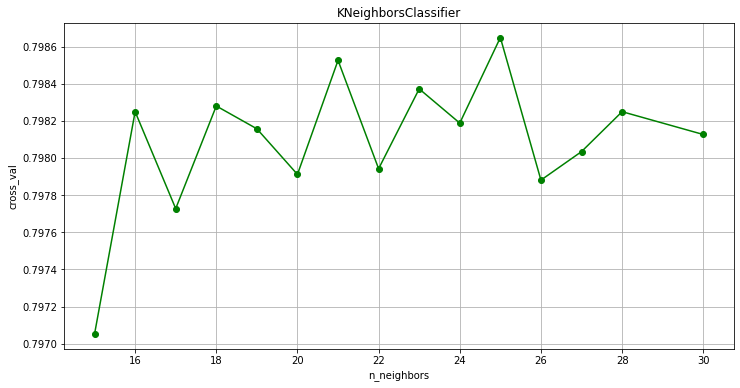

In [ ]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 29}, 0.7993243243243242)

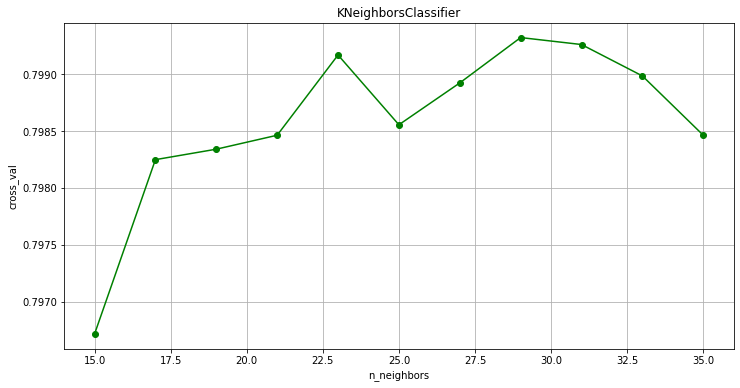

In [ ]:
# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

## 4.3.Обучение KNN с предобработкой данных

### 4.3.1.Нормализация

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - Стандартизация: $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - МинМакс нормализация: $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

#### 4.3.1.1. Стандартизация

Вручную

In [ ]:
X.T.std(axis=1)
# X.std()

array([1.36404324e+01, 1.05548144e+05, 2.57266946e+00, 7.38528959e+03,
       4.02959928e+02, 1.23474284e+01])

In [ ]:
X = (X - X.T.mean())/X.T.std()

In [ ]:
X.mean(axis=0)

array([3.85816339e+01, 1.89781814e+05, 1.00805897e+01, 1.07761517e+03,
       8.73065111e+01, 4.04374693e+01])

In [ ]:
X.std(axis=0)

array([1.36404324e+01, 1.05548144e+05, 2.57266946e+00, 7.38528959e+03,
       4.02959928e+02, 1.23474284e+01])

In [ ]:
X = (X - X.mean(axis=0))/X.std(axis=0)
X

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

Склерн

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_scaled

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

#### 4.3.1.2. Мин Макс Нормализация

Склерн

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# минимакс шкалирование
scaler = MinMaxScaler()
# инициализируем на основе данных X
scaler.fit(X)
# трансформируем X (потом этим же объектом scaler трансформируем test)
scaler.transform(X)

array([[0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.49315068, 0.15106831, 0.4       , 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

Вручную

In [ ]:
(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

array([[0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.49315068, 0.15106831, 0.4       , 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

### 4.3.2.Подборка параметра n_neighbors для KNeighborsClassifier при нормированных признаках

зачем нормализовывать?
см. [пункт нормализация](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

{'n_neighbors': 67} 0.8221437346437346


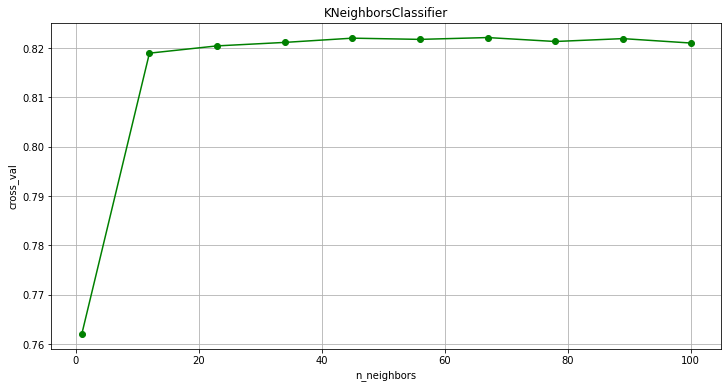

In [ ]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10)
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 59} 0.822972972972973


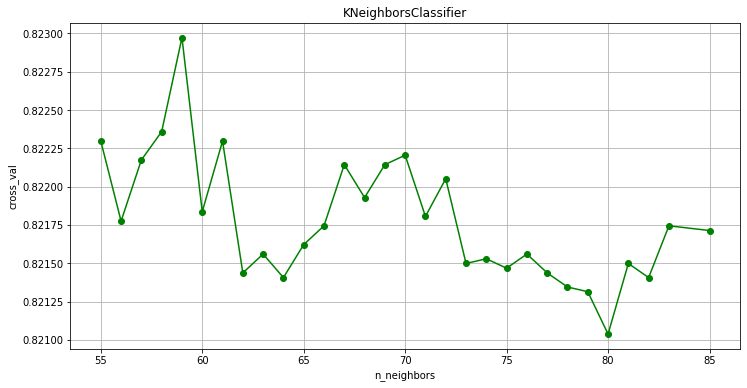

In [ ]:
# все тот же код, перебираем другие значения
grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

# 5.Метрики

## 5.1.Метрики для задачи классификации

[ВАЖНО](https://habr.com/ru/company/ods/blog/328372/) прочесть

### Accuracy

Не подходит для несбалансированных классов. 

Пускай имеем задачу кредитного скоринга: 100 людей, 10 из них ненадежные заемщики и выдача кредита им принесет убытки. Accuracy будет 90/100 = 90%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tain, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5.1.1.Два Класса

Используем 2 классификатора 
- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [ ]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59)# сюда можно передать сразу **gs.best_params()
                                          # чтобы не вбивать их вручную
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier().fit(X_train, y_tain)

In [ ]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [ ]:
y_mp

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# ответы knn
y_knn

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# реальные ответы
y_test

array([0, 0, 1, ..., 0, 1, 0])

#### Accuracy

$$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [ ]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.819823173569102 mp = 0.7553280595625872


#### Conf-matrix

##### KNN

[[7695  421]
 [1515 1114]]


Text(0.5, 42.0, 'Predicted value')

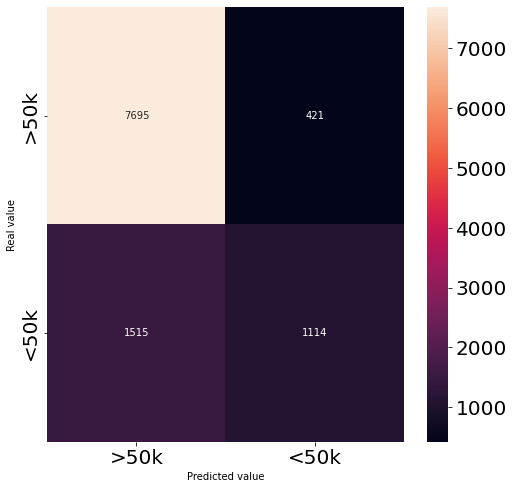

In [ ]:
import matplotlib

# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn
# см. https://habr.com/ru/company/ods/blog/328372/

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=['>50k', '<50k'], 
            yticklabels=['>50k', '<50k'])
plt.ylabel("Real value")
plt.xlabel("Predicted value")

##### Dummy

[[8116    0]
 [2629    0]]


Text(0.5, 42.0, 'Predicted value')

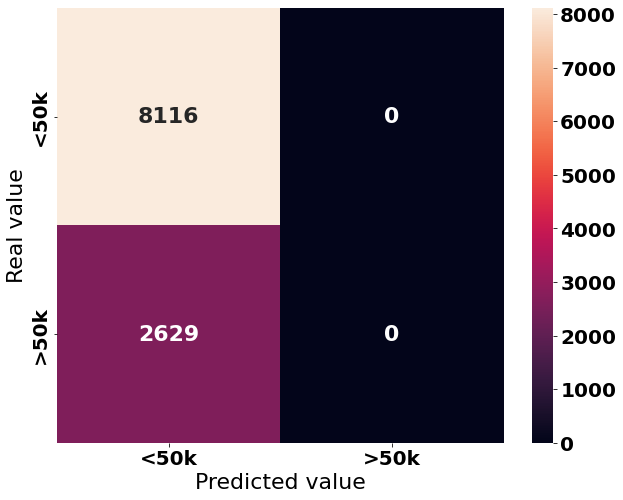

In [ ]:
# по аналогии от dummy

mp_mtx = metrics.confusion_matrix(y_test, y_mp)
print(mp_mtx)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=['<50k', '>50k'], 
            yticklabels=['<50k', '>50k'])
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#### Precision

$$Precision = \frac{TP}{TP + FP}$$

precision демонстрирует способность отличать этот класс от других классов

In [ ]:
print ('knn =', metrics.precision_score(y_test, y_knn), 'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.7262059973924381 mp = 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recall

$$Recall = \frac{TP}{TP + FN}$$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще

In [ ]:
print ('knn =', metrics.recall_score(y_test, y_knn), 'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.4237352605553442 mp = 0.0


In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8116
           1       0.73      0.42      0.54      2629

    accuracy                           0.82     10745
   macro avg       0.78      0.69      0.71     10745
weighted avg       0.81      0.82      0.80     10745



визуализация precision и recall

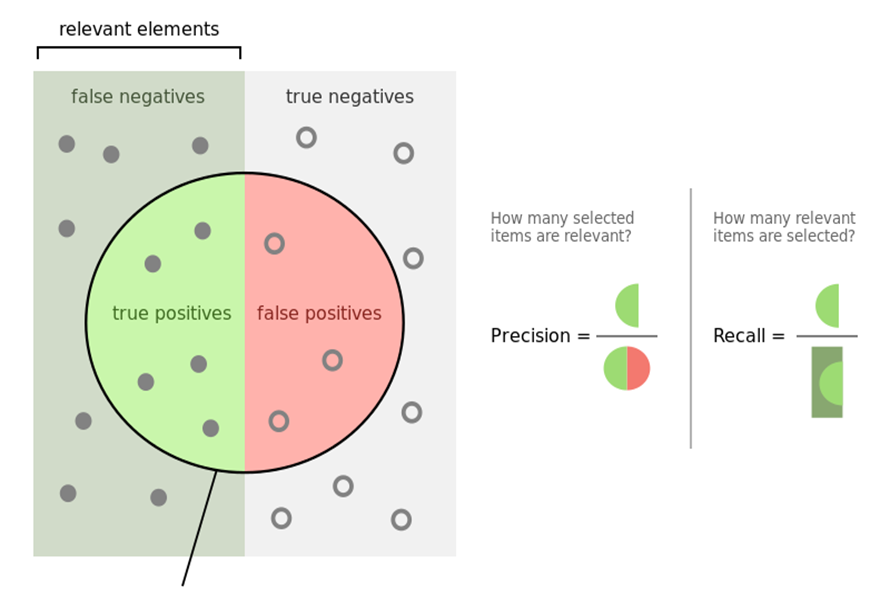

#### F1

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

* Как взвесить Precision и Recall?
    - Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0), 
    - Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
    - Гармоничиское среднее, сглаженный минимум

In [ ]:
print ('knn =', metrics.f1_score(y_test, y_knn), 'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.5351909680518856 mp = 0.0


![](https://img.grepmed.com/uploads/8345/specificity-table-confusionmatrix-biostatistics-contingency-original.jpeg)

#### AUC-ROC

[ВАЖНО](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/) прочесть

In [ ]:
# по аналогии возьмем knn и dummpy
clf_knn = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [ ]:
# получаем ответы от классификаторов
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

##### KNN

ROC AUC = 0.6927


Text(0.5, 0, 'False Positive Rate')

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


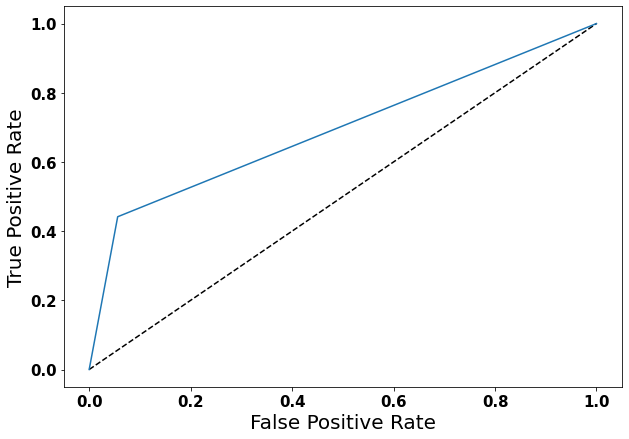

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

##### Dummy

ROC AUC = 0.5000


Text(0.5, 0, 'False Positive Rate')

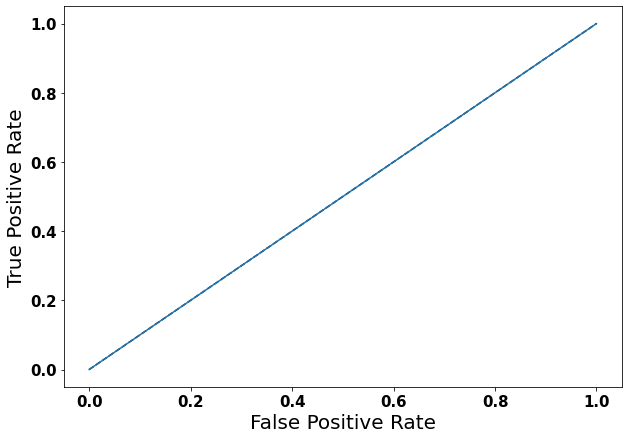

In [ ]:
from matplotlib import pylab
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(10, 7))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

### 5.1.2.<span style="color:orange"> Multiclass Precision-Recall </span>

 Загрузим датасет с тремя классами

In [ ]:
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,virginica
129,7.2,3.0,5.8,1.6,virginica
136,6.3,3.4,5.6,2.4,virginica
72,6.3,2.5,4.9,1.5,versicolor
116,6.5,3.0,5.5,1.8,virginica


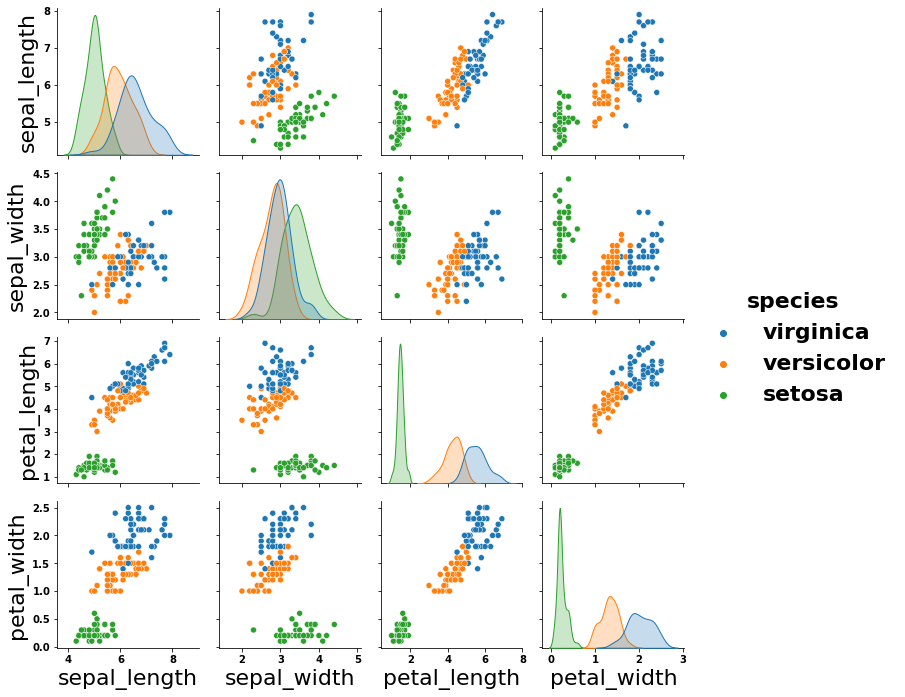

In [ ]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

[Датасет ириса](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [ ]:
len(df_iris)

150

In [ ]:
# закодируем значения
df_iris, encoders = number_encode_features(df_iris)
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

# разделим на train test слайсингом
iris_X_train, iris_y_tain = iris_X[:100], iris_y[:100]
iris_X_test, iris_y_test = iris_X[50:], iris_y[50:]

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,2
129,7.2,3.0,5.8,1.6,2
136,6.3,3.4,5.6,2.4,2
72,6.3,2.5,4.9,1.5,1
116,6.5,3.0,5.5,1.8,2


In [ ]:
# KNN и dummpy классификаторы на датасете
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [ ]:
# предсказываем
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


Text(0.5, 46.0, 'Predicted value')

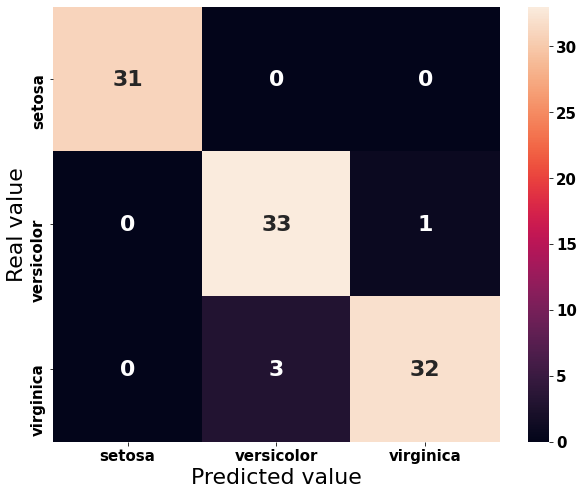

In [ ]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [ ]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

# 
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.5246098439375751 , micro =  0.63

для dummy-classifier:
macro =  0.5246098439375751 , micro =  0.63


## 5.2.Метрики для задачи рeгрессии

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### 5.2.1 Линейная регрессия

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')

In [ ]:
# будем предсказывать столбец quality (качество) вина по всем параметрам с помощью линейных методов и dummy
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcea8e10f10>,
      dtype=object)

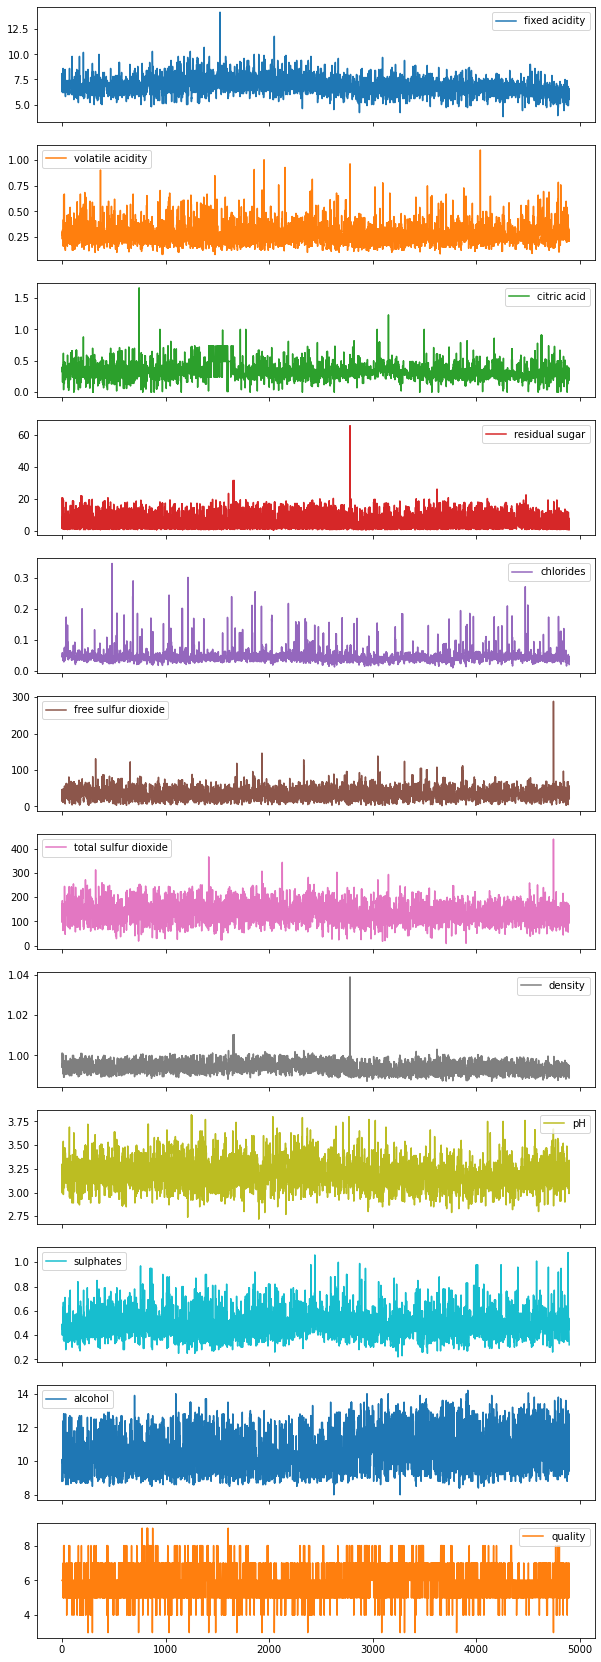

In [ ]:
# df['alcohol'].plot(marker='*',style=' ', color='green')
# df['alcohol'] = df[df['alcohol'] < 15]
df.plot(subplots=True, figsize=(10, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcea83fb410>,
      dtype=object)

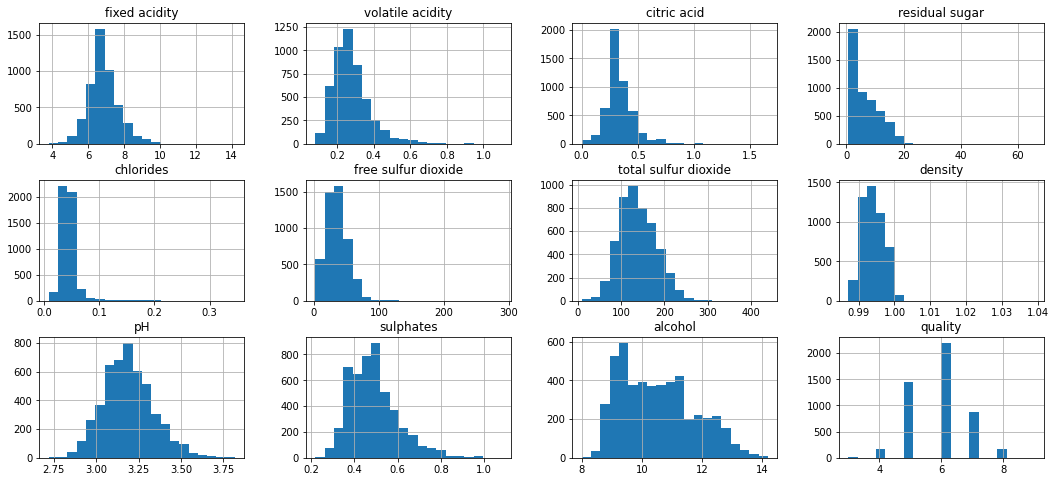

In [ ]:
# строим гистограммы быстрее, чем в начале занятия
df.hist(figsize=(18, 8), layout=(3,4), bins=20)

In [ ]:
# разделяем данные, убираем из обучающей ответы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3167,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1
324,8.3,0.41,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7
2305,7.0,0.36,0.30,5.0,0.040,40.0,143.0,0.99173,3.33,0.42,12.2
1777,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.5


In [ ]:
# качество вынесли в отдельную y
y_train.head()

3167    7
324     5
4731    6
2305    7
1777    6
Name: quality, dtype: int64

In [ ]:
# размеры обучающей и тестовой
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(3281, 11) (1617, 11)
(3281,) (1617,)


In [ ]:
from sklearn import linear_model

# линейный классификатор
regr = linear_model.LinearRegression()

# обучаем
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# dummy классификатор
from sklearn import dummy

d_regr = dummy.DummyRegressor(strategy='mean')

# обучаем
d_regr.fit(X_train, y_train)

DummyRegressor()

In [ ]:
# получаем предсказания от двух
predictions = regr.predict(X_test)

In [ ]:
d_predictions = d_regr.predict(X_test)

In [ ]:
# для всех вин имеем предсказания от линейного и dummy, отобразим первые 5
print (predictions.shape, '\t', predictions[0:5])

(1617,) 	 [6.37886848 6.3994996  6.40362171 5.82459689 6.45383134]


In [ ]:
print (d_predictions.shape, '\t', d_predictions[0:5])

(1617,) 	 [5.86863761 5.86863761 5.86863761 5.86863761 5.86863761]


(array([ 1.,  0.,  0.,  0.,  3.,  1.,  3.,  5.,  6.,  3.,  9.,  5., 10.,
         9., 10., 24., 40., 49., 40., 51., 60., 88., 70., 82., 86., 66.,
        84., 67., 70., 65., 87., 71., 66., 67., 62., 49., 49., 40., 30.,
        18., 24., 10., 20.,  4.,  3.,  6.,  3.,  0.,  0.,  1.]),
 array([4.1477337 , 4.21105059, 4.27436748, 4.33768437, 4.40100125,
        4.46431814, 4.52763503, 4.59095192, 4.6542688 , 4.71758569,
        4.78090258, 4.84421947, 4.90753636, 4.97085324, 5.03417013,
        5.09748702, 5.16080391, 5.22412079, 5.28743768, 5.35075457,
        5.41407146, 5.47738834, 5.54070523, 5.60402212, 5.66733901,
        5.73065589, 5.79397278, 5.85728967, 5.92060656, 5.98392345,
        6.04724033, 6.11055722, 6.17387411, 6.237191  , 6.30050788,
        6.36382477, 6.42714166, 6.49045855, 6.55377543, 6.61709232,
        6.68040921, 6.7437261 , 6.80704299, 6.87035987, 6.93367676,
        6.99699365, 7.06031054, 7.12362742, 7.18694431, 7.2502612 ,
        7.31357809]),
 <a list of 50

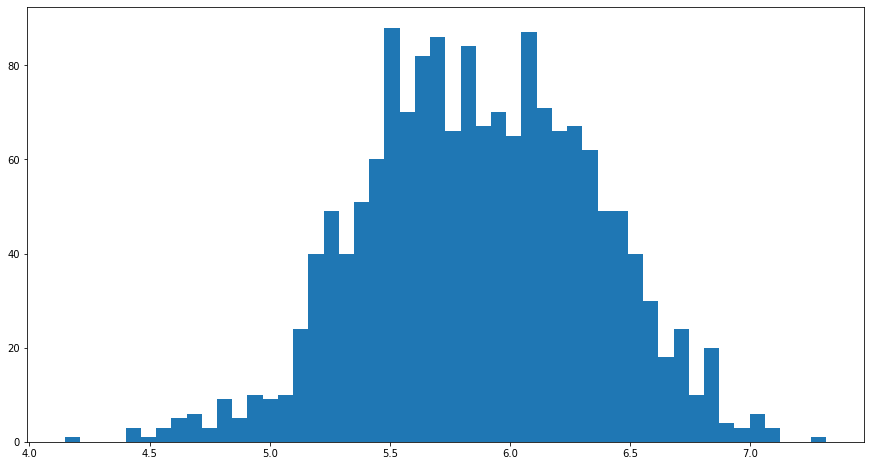

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.hist(predictions, bins=50)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_odno = X_test.values[12]
X_odno

array([6.300e+00, 1.200e-01, 3.600e-01, 2.100e+00, 4.400e-02, 4.700e+01,
       1.460e+02, 9.914e-01, 3.270e+00, 7.400e-01, 1.140e+01])

In [ ]:
import numpy as np

regr.predict(np.array([ X_odno ]))

array([6.65034987])

In [ ]:
y_test.values[12]

7

0.7465388196766425

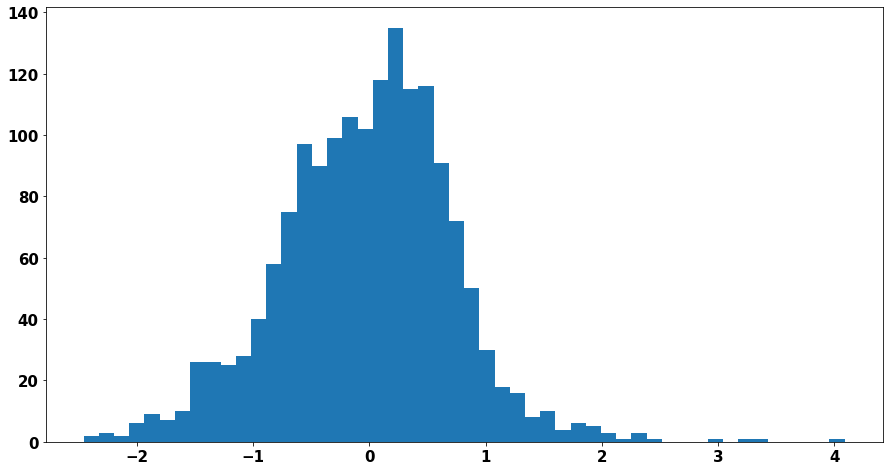

In [ ]:
# отобразим разность предсказаний на гистограмме
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50)
rem.std()

#### Mean Square Error 

## $$ MSE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2 $$

In [ ]:
# см. ссылки выше
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, predictions)
d_mse = metrics.mean_squared_error(y_test, d_predictions)

print ("MSE,  LR = {0:.4}, Dummy = {1:0.4}".format(mse, d_mse))

MSE,  LR = 0.5576, Dummy = 0.7638


In [ ]:
import numpy as np

rmse = np.sqrt(mse)
d_rmse = np.sqrt(d_mse)

print( "RMSE / LR = {0:.4}, Dummy = {1:0.4}".format(rmse, d_rmse))

RMSE / LR = 0.7467, Dummy = 0.8739


#### Mean Absolute Error 

## $$ MAE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} | y_i - \hat y_i | $$

In [ ]:
mae = metrics.mean_absolute_error(y_test, predictions)
d_mae = metrics.mean_absolute_error(y_test, d_predictions)

print( "MAE / LR = {0:.4}, Dummy = {1:0.4}".format(mae, d_mae))

MAE / LR = 0.5806, Dummy = 0.6663


#### Median Absolute Error 

In [ ]:
medae = metrics.median_absolute_error(y_test, predictions)
d_medae = metrics.median_absolute_error(y_test, d_predictions)

print ("MedAE / LR = {0:.4}, Dummy = {1:0.4}".format(medae, d_medae))

MedAE / LR = 0.481, Dummy = 0.8686


#### R² score, the coefficient of determination

## $$ R^2(y, \hat y) = 1 -  \frac{\sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2}{\sum_{i=1}^{n_{samples}} {( y_i - \bar y_i )^2}} $$

## $ \bar y = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} y_i $

In [ ]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, predictions)
d_r2 = metrics.r2_score(y_test, d_predictions)

print (f"R2 score / LR = {round(r2, 4)}, Dummy = {round(d_r2, 6)}")

R2 score / LR = 0.2692, Dummy = -0.001034


### 5.2.2. Логистическая регрессия

Вам надо найти в офф. документации логистическую регрессию и применить к нашым данным, сравнить оценки на test на метриках качества описанных выше с лин. регр.

In [ ]:
np.linspace(0.62, 1.66, 20)

array([0.62      , 0.67473684, 0.72947368, 0.78421053, 0.83894737,
       0.89368421, 0.94842105, 1.00315789, 1.05789474, 1.11263158,
       1.16736842, 1.22210526, 1.27684211, 1.33157895, 1.38631579,
       1.44105263, 1.49578947, 1.55052632, 1.60526316, 1.66      ])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Зададим сетку - среди каких значений выбирать наилучший параметр.
param_grid = {"C":list(range(1, 10)),
              "penalty":["l1","l2"]}

# Создаем объект кросс-валидации
gs = GridSearchCV(LogisticRegression(),
                  param_grid,
                  cv=5,
                  scoring=['r2', 'neg_mean_absolute_error'],
                  refit=False)

# Обучаем его
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'penalty': ['l1', 'l2']},
             refit=False, scoring=['r2', 'neg_mean_absolute_error'])

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.00091796, 0.213064  , 0.00084233, 0.21057358, 0.00063868,
        0.26918411, 0.00100055, 0.3535706 , 0.00094604, 0.23598061,
        0.00064917, 0.2048491 , 0.00061097, 0.21034307, 0.0006156 ,
        0.20918431, 0.0006279 , 0.20544367]),
 'std_fit_time': array([3.63633103e-04, 8.82674128e-03, 7.78314521e-05, 1.17879371e-02,
        7.86182002e-05, 6.09226967e-02, 1.78720043e-04, 2.27518135e-02,
        9.54978766e-05, 5.20925706e-02, 6.62131621e-05, 7.35718395e-03,
        7.99655488e-05, 8.98364457e-03, 8.06495028e-05, 1.06735581e-02,
        9.60706296e-05, 9.79608184e-03]),
 'mean_score_time': array([0.        , 0.00229635, 0.        , 0.00228739, 0.        ,
        0.00281692, 0.        , 0.00378847, 0.        , 0.00226378,
        0.        , 0.00239334, 0.        , 0.00224471, 0.        ,
        0.0026866 , 0.        , 0.0025351 ]),
 'std_score_time': array([0.00000000e+00, 4.58628612e-05, 0.00000000e+00, 4.20712536e-05,
        0.00000000e+00, 4.42

In [ ]:
gs.cv_results_['mean_test_r2']

array([        nan, -0.04129665,         nan, -0.03628559,         nan,
       -0.02556354,         nan, -0.02891078,         nan, -0.01725833,
               nan, -0.0334087 ,         nan, -0.02697855,         nan,
       -0.039295  ,         nan, -0.03041021])

In [ ]:
gs.cv_results_['params']

[{'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 2, 'penalty': 'l1'},
 {'C': 2, 'penalty': 'l2'},
 {'C': 3, 'penalty': 'l1'},
 {'C': 3, 'penalty': 'l2'},
 {'C': 4, 'penalty': 'l1'},
 {'C': 4, 'penalty': 'l2'},
 {'C': 5, 'penalty': 'l1'},
 {'C': 5, 'penalty': 'l2'},
 {'C': 6, 'penalty': 'l1'},
 {'C': 6, 'penalty': 'l2'},
 {'C': 7, 'penalty': 'l1'},
 {'C': 7, 'penalty': 'l2'},
 {'C': 8, 'penalty': 'l1'},
 {'C': 8, 'penalty': 'l2'},
 {'C': 9, 'penalty': 'l1'},
 {'C': 9, 'penalty': 'l2'}]

In [ ]:
list(zip(gs.cv_results_['mean_test_r2'],
         gs.cv_results_['mean_test_neg_mean_absolute_error'],
         gs.cv_results_['params']))

[(nan, nan, {'C': 1, 'penalty': 'l1'}),
 (-0.04129665372942197, -0.6248055648364703, {'C': 1, 'penalty': 'l2'}),
 (nan, nan, {'C': 2, 'penalty': 'l1'}),
 (-0.036285587555471774, -0.6208440063852694, {'C': 2, 'penalty': 'l2'}),
 (nan, nan, {'C': 3, 'penalty': 'l1'}),
 (-0.025563542197072554, -0.6153571295986933, {'C': 3, 'penalty': 'l2'}),
 (nan, nan, {'C': 4, 'penalty': 'l1'}),
 (-0.028910781603679013, -0.6205377361992797, {'C': 4, 'penalty': 'l2'}),
 (nan, nan, {'C': 5, 'penalty': 'l1'}),
 (-0.017258331971064744, -0.6156596874187918, {'C': 5, 'penalty': 'l2'}),
 (nan, nan, {'C': 6, 'penalty': 'l1'}),
 (-0.0334086960823504, -0.6223670044919627, {'C': 6, 'penalty': 'l2'}),
 (nan, nan, {'C': 7, 'penalty': 'l1'}),
 (-0.02697854956336663, -0.6226732746779523, {'C': 7, 'penalty': 'l2'}),
 (nan, nan, {'C': 8, 'penalty': 'l1'}),
 (-0.039294996667579296, -0.6263299550803728, {'C': 8, 'penalty': 'l2'}),
 (nan, nan, {'C': 9, 'penalty': 'l1'}),
 (-0.030410209885863893, -0.6205372721535435, {'C': 

In [ ]:
alg = LogisticRegression(C=1,
                         penalty='l2')
alg.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
preds_logistic = alg.predict(X_test)

In [ ]:
from sklearn import metrics

# r2 score
metrics.r2_score(y_test, preds_logistic)

-0.026948166846952892

In [ ]:
# median absolute error
metrics.median_absolute_error(y_test, preds_logistic)

1.0

Text(0, 0.5, 'Recall')

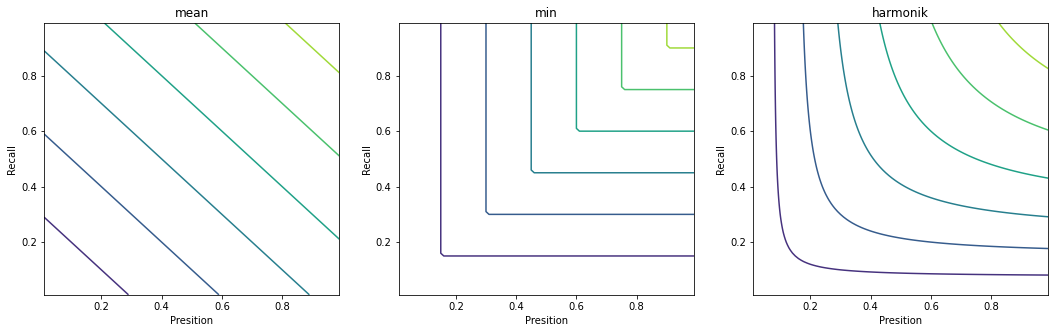

In [ ]:
# не понял зачем это тут

import scipy

fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

x_, y_ = np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x_, y_)

Z = [[0.5*x + 0.5*y  for x in x_] for y in y_]
axs[0].contour(X, Y, Z)
axs[0].set_title('mean')
axs[0].set_xlabel('Presition')
axs[0].set_ylabel('Recall')

Z = [[min(x, y)  for x in x_] for y in y_]
axs[1].contour(X, Y, Z)
axs[1].set_title('min')
axs[1].set_xlabel('Presition')
axs[1].set_ylabel('Recall')


Z = [[scipy.stats.hmean([x, y])  for x in x_] for y in y_]
axs[2].contour(X, Y, Z)
axs[2].set_title('harmonik')
axs[2].set_xlabel('Presition')
axs[2].set_ylabel('Recall')